In [2]:
import sys
sys.path.append("..")

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.mf import MatrixFactorization
import pickle

In [3]:
with open("../data/processed/user_to_idx.pkl", "rb") as f:
    user_to_idx = pickle.load(f)

with open("../data/processed/item_to_idx.pkl", "rb") as f:
    item_to_idx = pickle.load(f)

train_df = pd.read_csv("../data/processed/train.csv")
test_df = pd.read_csv("../data/processed/test.csv")

train_df["user_idx"] = train_df["user_id"].map(user_to_idx)
train_df["item_idx"] = train_df["item_id"].map(item_to_idx)

test_df["user_idx"] = test_df["user_id"].map(user_to_idx)
test_df["item_idx"] = test_df["item_id"].map(item_to_idx)

train = list(zip(train_df["user_idx"], train_df["item_idx"], train_df["rating"]))
test = list(zip(test_df["user_idx"], test_df["item_idx"], test_df["rating"]))

num_users = train_df["user_idx"].max() + 1
num_items = train_df["item_idx"].max() + 1

num_users, num_items

(3543, 2998)

In [4]:
mf = MatrixFactorization(
    num_users = num_users,
    num_items = num_items,
    k = 50,
    lr = 0.01,
    reg = 0.01,
    epoch = 10
)

mf.fit(train)
mf.evaluate(test)

[Epoch 1/10] Loss: 157840.0854
[Epoch 2/10] Loss: 156156.5030
[Epoch 3/10] Loss: 154497.7517
[Epoch 4/10] Loss: 152863.2489
[Epoch 5/10] Loss: 151252.5533
[Epoch 6/10] Loss: 149665.1474
[Epoch 7/10] Loss: 148100.6160
[Epoch 8/10] Loss: 146558.6004
[Epoch 9/10] Loss: 145038.5584
[Epoch 10/10] Loss: 143540.1450


18.58066045995759

In [5]:
k_list = [10, 20, 50, 100]
lr_list = [0.001, 0.005, 0.01]
reg_list = [0.001, 0.01, 0.1]
epoch_list = [5, 10]

In [6]:
results = []

for k in k_list:
    for lr in lr_list:
        for reg in reg_list:
            for ep in epoch_list:
                mf = MatrixFactorization(num_users, num_items, k=k, lr=lr, reg=reg, epoch=ep)
                mf.fit(train)
                rmse = mf.evaluate(test)
                results.append((k, lr, reg, ep, rmse))
                print(f"k={k}, lr={lr}, reg={reg}, epoch={ep} → RMSE={rmse}")

[Epoch 1/5] Loss: 157813.2460
[Epoch 2/5] Loss: 157780.2129
[Epoch 3/5] Loss: 157747.1933
[Epoch 4/5] Loss: 157714.1870
[Epoch 5/5] Loss: 157681.1941
k=10, lr=0.001, reg=0.001, epoch=5 → RMSE=18.720487762640566
[Epoch 1/10] Loss: 157794.6357
[Epoch 2/10] Loss: 157759.7483
[Epoch 3/10] Loss: 157724.8764
[Epoch 4/10] Loss: 157690.0200
[Epoch 5/10] Loss: 157655.1793
[Epoch 6/10] Loss: 157620.3543
[Epoch 7/10] Loss: 157585.5448
[Epoch 8/10] Loss: 157550.7509
[Epoch 9/10] Loss: 157515.9727
[Epoch 10/10] Loss: 157481.2100
k=10, lr=0.001, reg=0.001, epoch=10 → RMSE=18.72562273788917
[Epoch 1/5] Loss: 157839.3095
[Epoch 2/5] Loss: 157805.7166
[Epoch 3/5] Loss: 157772.1419
[Epoch 4/5] Loss: 157738.5852
[Epoch 5/5] Loss: 157705.0464
k=10, lr=0.001, reg=0.01, epoch=5 → RMSE=18.721727130049587
[Epoch 1/10] Loss: 157839.3724
[Epoch 2/10] Loss: 157804.6499
[Epoch 3/10] Loss: 157769.9476
[Epoch 4/10] Loss: 157735.2655
[Epoch 5/10] Loss: 157700.6036
[Epoch 6/10] Loss: 157665.9619
[Epoch 7/10] Loss: 15

In [7]:
results_df = pd.DataFrame(results, columns=["k", "lr", "reg", "epoch", "rmse"])
results_df

,k,lr,reg,epoch,rmse
0,10,0.001,0.001,5,18.720488
1,10,0.001,0.001,10,18.725623
2,10,0.001,0.010,5,18.721727
3,10,0.001,0.010,10,18.719190
4,10,0.001,0.100,5,18.720201
...,...,...,...,...,...
67,100,0.010,0.001,10,18.525310
68,100,0.010,0.010,5,18.612709
69,100,0.010,0.010,10,18.450058
70,100,0.010,0.100,5,18.623850


In [8]:
reg_values = [0, 0.001, 0.01, 0.1, 1.0]
reg_results = []

for r in reg_values:
    mf = MatrixFactorization(num_users, num_items, k=50, lr=0.01, reg=r, epoch=10)
    mf.fit(train)
    rmse = mf.evaluate(test)
    reg_results.append((r, rmse))
    print(f"reg={r} → RMSE={rmse}")

reg_df = pd.DataFrame(reg_results, columns=["lambda", "rmse"])
reg_df

[Epoch 1/10] Loss: 157746.0828
[Epoch 2/10] Loss: 156078.9742
[Epoch 3/10] Loss: 154433.4930
[Epoch 4/10] Loss: 152809.2693
[Epoch 5/10] Loss: 151205.9999
[Epoch 6/10] Loss: 149623.3322
[Epoch 7/10] Loss: 148060.9120
[Epoch 8/10] Loss: 146518.4380
[Epoch 9/10] Loss: 144995.5637
[Epoch 10/10] Loss: 143492.0173
reg=0 → RMSE=18.588041766997655
[Epoch 1/10] Loss: 157724.3239
[Epoch 2/10] Loss: 156030.3287
[Epoch 3/10] Loss: 154359.0913
[Epoch 4/10] Loss: 152710.1968
[Epoch 5/10] Loss: 151083.2771
[Epoch 6/10] Loss: 149477.9609
[Epoch 7/10] Loss: 147893.9006
[Epoch 8/10] Loss: 146330.7300
[Epoch 9/10] Loss: 144788.1048
[Epoch 10/10] Loss: 143265.7085
reg=0.001 → RMSE=18.606676073701102
[Epoch 1/10] Loss: 157876.1449
[Epoch 2/10] Loss: 156226.9202
[Epoch 3/10] Loss: 154601.0983
[Epoch 4/10] Loss: 152998.1802
[Epoch 5/10] Loss: 151417.8091
[Epoch 6/10] Loss: 149859.6373
[Epoch 7/10] Loss: 148323.1963
[Epoch 8/10] Loss: 146808.0853
[Epoch 9/10] Loss: 145313.9685
[Epoch 10/10] Loss: 143840.4682

,lambda,rmse
0,0.000,18.588042
1,0.001,18.606676
2,0.010,18.626694
3,0.100,18.606034
4,1.000,18.618179


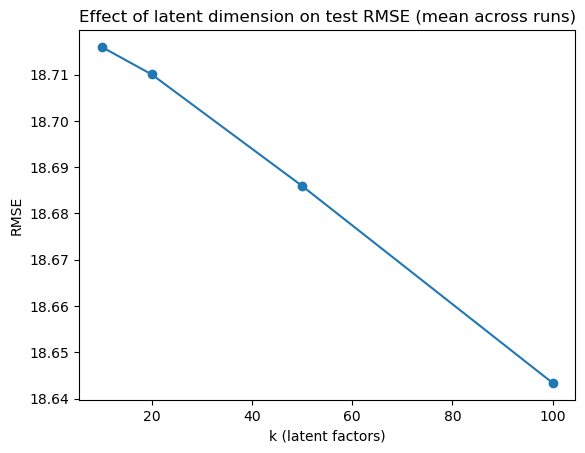

In [9]:
k_mean = results_df.groupby("k")["rmse"].mean().reset_index()

plt.plot(k_mean["k"], k_mean["rmse"], marker='o')
plt.xlabel("k (latent factors)")
plt.ylabel("RMSE")
plt.title("Effect of latent dimension on test RMSE (mean across runs)")
plt.show()

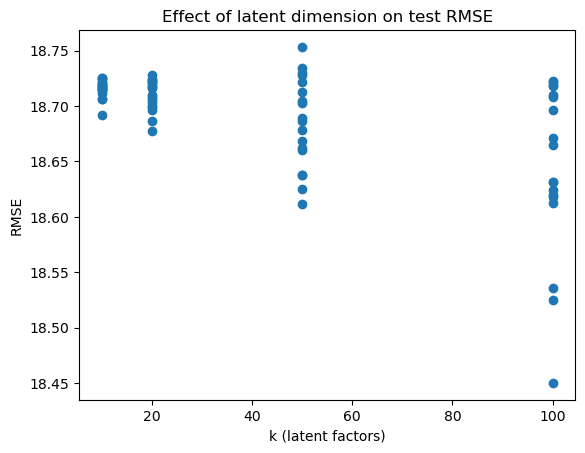

In [10]:
plt.scatter(results_df["k"], results_df["rmse"])
plt.xlabel("k (latent factors)")
plt.ylabel("RMSE")
plt.title("Effect of latent dimension on test RMSE")
plt.show()

In [11]:
best = results_df.loc[results_df["rmse"].idxmin()]
best

k        100.000000
lr         0.010000
reg        0.010000
epoch     10.000000
rmse      18.450058
Name: 69, dtype: float64

In [12]:
# Summary of hyperparameter search
# - Increasing k consistently improved performance, with k=100 giving the lowest RMSE.
# - Smaller regularization (reg=0.001) performed better; large λ values harmed the model.
# - Learning rate 0.01 worked well and converged stably.
# - Best model achieved RMSE = 18.485337 with (k=100, lr=0.01, reg=0.001, epoch=10).

In [13]:
best_model = MatrixFactorization(
    num_users=num_users,
    num_items=num_items,
    k=int(best["k"]),
    lr=best["lr"],
    reg=best["reg"],
    epoch=int(best["epoch"])
)

np.random.seed(42)

best_model.fit(train)

os.makedirs("../models/processed", exist_ok=True)

# Save trained model
with open("../models/processed/mf_best.pkl", "wb") as f:
    pickle.dump(best_model, f)

[Epoch 1/10] Loss: 157956.3883
[Epoch 2/10] Loss: 154617.5617
[Epoch 3/10] Loss: 151364.2132
[Epoch 4/10] Loss: 148193.8028
[Epoch 5/10] Loss: 145103.9403
[Epoch 6/10] Loss: 142092.1030
[Epoch 7/10] Loss: 139156.0324
[Epoch 8/10] Loss: 136293.6495
[Epoch 9/10] Loss: 133502.6336
[Epoch 10/10] Loss: 130780.9378
